In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [14]:
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

Hello world
I'm evolving!!!



In [15]:
# local dos dados e modifica o diretorio
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)
!git clone https://github.com/ucfilho/ANN
%cd ANN
!ls

Cloning into 'ANN'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 72 (delta 5), reused 0 (delta 0), pack-reused 54
Unpacking objects: 100% (72/72), done.
/content/ANN/ANN
 ann_aula_ago_14_2018_leitura_git.ipynb
'ANN_aula_Scikit_learn _ago_29_2018.ipynb'
 ANN_Hydrofoil_ago_29_2018.txt.ipynb
 ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
 ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
 ANN_Hydrofoil_Neuronio_set_17_2018.ipynb
 ANN_Hydrofoil_set_05_2018.ipynb
 ANN_Hydrofoil_set_12_2018.ipynb
 Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
 arvore.jpg
 Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
 aula_04_rede_neural_set_05_2018.pdf
 BBC_007041008.wav
 Constroi_ANN_set_19_2018.ipynb
 Criando_Gethub_Ver_Youtube.txt
 Differential_Evolution_Python_set_26_2018.ipynb
 FAULT_DIAGNOSIS_maio_25_2017.txt
 Hydrofoil_ago_29_2018.csv
 john_mccarthy.png
 Paper_Carvao_China_abril_12_2016.csv
 

In [0]:
# sigmoid function                                           # usa a sigmoide no neuronio oculto
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function                                           #a gaussiana é muito utilizada para classificação. aplica a purelin na saida
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion 
def Normatiza(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x

# normatize funcion
def Original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)                                        #armazenar os dados antigos pq depois quero voltar
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [17]:
# leitura dos dados                                               #numero de froude e tipo de barco (entradas); resistencia (saida) 
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
print(DAT.head())

   Unnamed: 0  Case  Hydrofoil    Froude  Resistence   Sinkage      Trim  \
0           1     1          1  0.000000    0.000000  0.000000  0.000000   
1           2     2          1  0.103733    2.549729 -0.689028  1.353022   
2           3     3          1  0.124480    3.628461 -0.835413  1.346323   
3           4     4          1  0.165973    6.374322 -1.864337  1.361538   
4           5     5          1  0.186719    8.217973 -2.301539  1.378858   

      Power  
0  0.000000  
1  0.950991  
2  1.624000  
3  3.803965  
4  5.517212  


In [23]:

# leitura dos dados                                               #numero de froude e tipo de barco (entradas); resistencia (saida) 
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")

# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
Y_old=Dat_Select['Resistence'].copy()
print(Dat_Select.head())

# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
#print(DAT.head())

# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=None).copy() # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index).copy()
X_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values #transformei meus dados numa matriz com o hydrofoil e numero de froude, dataframe. depois vamos multiplicar matrizes  
X_test=test.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values
Y_test=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values
Y_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values



   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [19]:
print (X_train)

[[0.66666667 0.69144339]
 [0.33333333 0.08643042]
 [1.         0.51858254]
 [1.         0.17286085]
 [1.         0.86430424]
 [0.         0.25929127]
 [0.66666667 0.25929127]
 [0.         1.        ]
 [0.33333333 0.60501296]
 [0.33333333 0.43215212]
 [0.33333333 0.77787381]
 [0.         0.05185825]
 [0.33333333 0.86430424]
 [0.         0.        ]
 [1.         0.69144339]
 [0.         0.17286085]
 [1.         0.8988764 ]
 [0.33333333 1.        ]
 [0.33333333 0.51858254]
 [0.33333333 0.        ]
 [0.66666667 0.84442524]
 [0.         0.43215212]
 [0.66666667 0.60501296]
 [0.33333333 0.84442524]
 [0.33333333 0.34572169]
 [0.66666667 0.51858254]
 [1.         0.08643042]
 [0.66666667 0.        ]
 [0.33333333 0.69144339]
 [0.         0.51858254]
 [1.         0.77787381]
 [0.         0.84442524]
 [0.66666667 0.77787381]
 [0.         0.04321521]
 [1.         0.84442524]
 [0.66666667 0.08643042]
 [0.33333333 0.25929127]
 [0.66666667 0.34572169]
 [1.         0.34572169]
 [0.66666667 0.43215212]


In [0]:
# Parametros da rede neural
Neuron_input=2 #froude e tipo
Neuron_hidden=20
Neuron_output=1 #resistencia
Learning_rate=0.01
omega=0.9   #fator de inércia. evitar as oscilaçoes abruptas.  
Epoch=50000  #quantas iteraçoes vc fez. 

Epoch 0 error:0.7845522583612123
Epoch 5000 error:0.037892935453636305
Epoch 10000 error:0.03776054304125969
Epoch 15000 error:0.037746155998543404
Epoch 20000 error:0.037737713884414124
Epoch 25000 error:0.037720596500899026
Epoch 30000 error:0.03769980387372205
Epoch 35000 error:0.03767629648517564
Epoch 40000 error:0.03765029033736079
Epoch 45000 error:0.03762172540181261


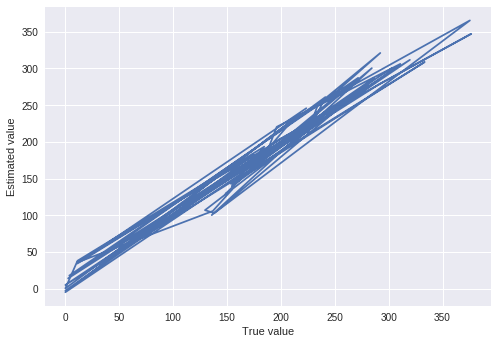

In [21]:
# randomly initialize our weights with mean 0.          Agora começarei a montar minha rede 
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1 #estou enchendo a matriz com numeros entre -1 e 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1

for j in range(Epoch):

    # Feed forward through layers=camada 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0)) #produto (dot) entre as matrizes l0 e syn0 = l1
    l2 = purelin(np.dot(l1,syn1))  #produto (dot) entre as matrizes l1 e l2 = syn1

    # how much did we miss the target value?
    l2_error = Y_train - l2 #erro é a resposta - ela mesma

    if (j% 5000) == 0: #imprime uma resposta de 5000 em 5000 iteraçoes
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*purelin(l2,deriv=True)  #mostra a direção de correcao de cada variável. derivada de l2 mostrará a direçao do erro, e assim sucessivamente.
    l1_error = l2_delta.dot(syn1.T) #matriz transposta (T) para conseguir multiplicar. inverte a matriz. a primeira informaçao de retorno=correçao é chamada de delta. 
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate #correção dos pesos utiliza a informação que voltou. utilizou a lei de híbrido.
    syn0 += l0.T.dot(l1_delta)*Learning_rate

Y_test=pd.DataFrame(Y_test)
Y_test.columns = ["y_test"]
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
y_old=pd.DataFrame({'y_old':Y_old})
y_calc=Original(y_calc,y_old)
y_obs=Original(Y_test,y_old)

#plt.scatter(y_obs,y_calc, s=10, c='b', marker="s")
plt.plot(y_obs,y_calc)
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.show()

In [22]:
mse=mean_squared_error(y_obs,y_calc)
print("MSE teste=",mse)
R2=r2_score(y_obs,y_calc)
print("R^2 teste=",R2)

MSE teste= 295.3538676434459
R^2 teste= 0.9755674242485651
